In [ ]:
# %pip install pillow
# %pip install matplotlib
# %pip install imageio

In [1]:
from PIL import Image, ImageDraw, ImageEnhance
from numpy import arange
import matplotlib.pyplot as plt
from imageio import imsave
import json
import stl10
import os

sys.version_info(major=3, minor=11, micro=6, releaselevel='final', serial=0)


In [47]:

def draw_transparent_squares(
        img_bin_loc,
        segment_marks_json_loc,
        img_index,  
        squarenum_x=16,  
        outline_color="#ffffff", 
        transparency=0.4
        ):

    layerColors = {
    "0": "#ffff00",
    "1": "#ff0000",
    "2": "#00ff00",
    "3": "#4169e1",
    "4": "#ff00ff",
    "5": "#ffa500",
    "6": "#00ffff",
    "7": "#00bfff",
    "8": "#cd5c5c",
    }

    with open(segment_marks_json_loc, 'r') as f:
        segment_marks = json.load(f)

    marked_squares = segment_marks[str(img_index)]

    all_images = stl10.read_all_images(img_bin_loc)
    img = Image.fromarray(all_images[int(img_index)]).convert("RGBA")
    imgWidth, imgHeight = img.size

    overlay = Image.new("RGBA", img.size, (255, 255, 255, 0))
    draw = ImageDraw.Draw(overlay)
    
    squareSize = min(imgWidth, imgHeight)/squarenum_x

    for label in marked_squares:
        # overlay = Image.new("RGBA", img.size, (255, 255, 255, 0))
        # draw = ImageDraw.Draw(overlay)
        for y in arange(0, imgHeight, squareSize):
            for x in arange(0, imgWidth, squareSize):
                top_left = (x, y)
                bottom_right = (x + squareSize, y + squareSize)

            # for label in marked_squares:
                if [int(x / squareSize), int(y / squareSize)] in marked_squares[label]:
                    draw.rectangle([top_left, bottom_right], 
                                    fill=layerColors[label[-1]]+ format(int(transparency * 255), '02X'),
                                    outline=layerColors[label[-1]] + format(int(transparency * 255), '02X'),
                                    width=1)
                else:
                    draw.rectangle([top_left, bottom_right], outline=outline_color + format(int(transparency * 255), '02X'), width=1)
    
        combined = Image.alpha_composite(img, overlay)
        combined.save(f"./3_car/new_{img_index}.png")
        # fig, ax = plt.subplots()
        # ax.imshow(combined)

with open('./stl10_test_car.json', 'r') as s: 
    saved = json.load(s)

for key in saved.keys():
    if os.path.exists(f"./3_car/{key}.png"):
        continue
    else:
        draw_transparent_squares("./stl10_binary/test_X.bin", './stl10_test_car.json', key)

In [139]:
with open('./stl10_test_car.json', 'r') as s: 
    saved = json.load(s)

toBeBlocked = [k for k in saved if len(saved[k])> 1]

In [39]:

def draw_transparent_squares_v2(
        img_bin_loc,
        segment_marks_json_loc,
        img_index,  
        squarenum_x=16,  
        outline_color="#ffffff", 
        transparency=0.4
        ):

    layerColors = {
    "0": "#ffff00",
    "1": "#ff0000",
    "2": "#00ff00",
    "3": "#4169e1",
    "4": "#ff00ff",
    "5": "#ffa500",
    "6": "#00ffff",
    "7": "#00bfff",
    "8": "#cd5c5c",
    }

    with open(segment_marks_json_loc, 'r') as f:
        segment_marks = json.load(f)

    marked_squares = segment_marks[str(img_index)]

    all_images = stl10.read_all_images(img_bin_loc)
    img = Image.fromarray(all_images[int(img_index)]).convert("RGBA")
    imgWidth, imgHeight = img.size

    overlay = Image.new("RGBA", img.size, (255, 255, 255, 0))
    draw = ImageDraw.Draw(overlay)
    
    squareSize = min(imgWidth, imgHeight)/squarenum_x

    for label in marked_squares:
        overlay = Image.new("RGBA", img.size, (255, 255, 255, 0))
        draw = ImageDraw.Draw(overlay)
        for y in arange(0, imgHeight, squareSize):
            for x in arange(0, imgWidth, squareSize):
                top_left = (x, y)
                bottom_right = (x + squareSize, y + squareSize)

            # for label in marked_squares:
                if [int(x / squareSize), int(y / squareSize)] in marked_squares[label]:
                    draw.rectangle([top_left, bottom_right], 
                                    fill=layerColors[label[-1]]+ format(int(transparency * 255), '02X'),
                                    outline=layerColors[label[-1]] + format(int(transparency * 255), '02X'),
                                    width=1)
                else:
                    draw.rectangle([top_left, bottom_right], outline=outline_color + format(int(transparency * 255), '02X'), width=1)
    
        combined = Image.alpha_composite(img, overlay)
        # combined.save(f"./3_car/new_{img_index}_{label}.png")
        fig, ax = plt.subplots()
        ax.imshow(combined)

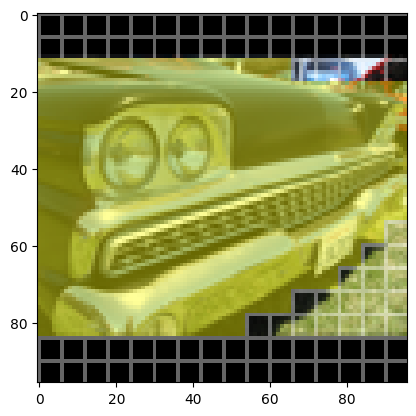

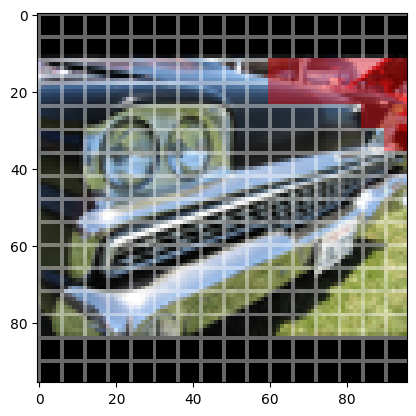

In [46]:
draw_transparent_squares_v2("./stl10_binary/test_X.bin", './stl10_test_car.json', "2748")

In [6]:
len([
    [0,0],[0,1],[0,2],[0,3],[0,4],[0,5],[0,6],[0,7],[0,8],[0,9],[0,10],[0,11],[0,12],[0,13],[0,14],[0,15],
    [1,0],[1,1],[1,2],[1,3],[1,4],[1,5],[1,6],[1,7],[1,8],[1,9],[1,10],[1,11],[1,12],[1,13],[1,14],[1,15],
    [2,0],[2,1],[2,2],[2,3],[2,4],[2,5],[2,6],[2,7],[2,8],[2,9],[2,10],[2,11],[2,12],[2,13],[2,14],[2,15],
    [3,0],[3,1],[3,2],[3,3],[3,4],[3,5],[3,6],[3,7],[3,8],[3,9],[3,10],[3,11],[3,12],[3,13],[3,14],[3,15],
    [4,0],[4,1],[4,2],[4,3],[4,4],[4,5],[4,6],[4,7],[4,8],[4,9],[4,10],[4,11],[4,12],[4,13],[4,14],[4,15],
    [5,0],[5,1],[5,2],[5,3],[5,4],[5,5],[5,6],[5,7],[5,8],[5,9],[5,10],[5,11],[5,12],[5,13],[5,14],[5,15],
    [6,0],[6,1],[6,2],[6,3],[6,4],[6,5],[6,6],[6,7],[6,8],[6,9],[6,10],[6,11],[6,12],[6,13],[6,14],[6,15],
    [7,0],[7,1],[7,2],[7,3],[7,4],[7,5],[7,6],[7,7],[7,8],[7,9],[7,10],[7,11],[7,12],[7,13],[7,14],[7,15],
    [8,0],[8,1],[8,2],[8,3],[8,4],[8,5],[8,6],[8,7],[8,8],[8,9],[8,10],[8,11],[8,12],[8,13],[8,14],[8,15],
    [9,0],[9,1],[9,2],[9,3],[9,4],[9,5],[9,6],[9,7],[9,8],[9,9],[9,10],[9,11],[9,12],[9,13],[9,14],[9,15],
    [10,0],[10,1],[10,2],[10,3],[10,4],[10,5],[10,6],[10,7],[10,8],[10,9],[10,10],[10,11],[10,12],[10,13],[10,14],[10,15],
    [11,0],[11,1],[11,2],[11,3],[11,4],[11,5],[11,6],[11,7],[11,8],[11,9],[11,10],[11,11],[11,12],[11,13],[11,14],[11,15],
    [12,0],[12,1],[12,2],[12,3],[12,4],[12,5],[12,6],[12,7],[12,8],[12,9],[12,10],[12,11],[12,12],[12,13],[12,14],[12,15],
    [13,0],[13,1],[13,2],[13,3],[13,4],[13,5],[13,6],[13,7],[13,8],[13,9],[13,10],[13,11],[13,12],[13,13],[13,14],[13,15],
    [14,0],[14,1],[14,2],[14,3],[14,4],[14,5],[14,6],[14,7],[14,8],[14,9],[14,10],[14,11],[14,12],[14,13],[14,14],[14,15],
    [15,0],[15,1],[15,2],[15,3],[15,4],[15,5],[15,6],[15,7],[15,8],[15,9],[15,10],[15,11],[15,12],[15,13],[15,14],[15,15]])

256